In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.pylab as plab

In [2]:
education_data = pd.read_csv('2015_16_Districtwise.csv')
education_metadata= pd.read_csv('2015_16_Districtwise_Metadata.csv')

In [3]:
education_data.head()


,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,11.33,197001.90,34.62,...,21322,26,2594,3489,5315,27,62,23,852,239
1,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,17.19,161871.18,20.34,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,98.73,155798.45,23.56,...,5444,31,408,817,3284,886,11,0,2873,40
3,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,11.74,150755.79,21.18,...,12469,18,857,2290,3837,119,45,8,1035,325
4,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,13.80,97651.28,29.18,...,7408,17,855,1688,2584,151,67,5,1101,209


In [4]:
# tackling ratio of failure rates of students with disabilities vs students without disabilities

data_small = education_data.loc[:, "C1_B":"C9_GR"]
boys_all = education_data.loc[:, "C6_B":"C8_B"];
girls_all = education_data.loc[:, "C6_G":"C8_G"];
data_small.shape

(680, 54)

In [5]:
# total enrolment of boys and girls
t_enrol_boys = sum(sum(boys_all.values[:,:]))
t_enrol_girls = sum(sum(girls_all.values[:,:]))


In [6]:
boys_dis = data_small.loc[:,"C6_BD":"C8_BD"]
girls_dis = data_small.loc[:,"C6_GD":"C8_GD"]
t_enrol_dis_boys = sum(sum(boys_dis.values[:,:]))
t_enrol_dis_girls = sum(sum(girls_dis.values[:,:]))

total_enrol = t_enrol_girls+t_enrol_boys
total_dis = t_enrol_dis_girls+t_enrol_dis_boys
total_dis/total_enrol

0.011329675607323739

Students with disabilities account for nearly 2% of students

In [7]:
d1 = data_small.loc[:, "C6_BR":"C8_BR"]
d2 = data_small.loc[:, "C6_GR":"C8_GR"]

total_repeat = sum(sum(d1.values[:,:])) + sum(sum(d2.values[:,:]))
print(total_dis/total_repeat)

3.16558434848


In [8]:
repeat_individual = np.transpose(sum(np.transpose(d2.values)) + sum(np.transpose(d1.values)))
data_small["repeat"] = repeat_individual

disability = np.transpose(sum(np.transpose(boys_dis.values)) + sum(np.transpose(girls_dis.values)))
data_small["disability"] = disability

ratio_repeat = repeat_individual/total_repeat
dis_repeat = repeat_individual/disability
ratio_total_dis = disability/total_dis

data_small["ratio_total_dis"] = disability/total_dis


# shows the ratio of repeaters with respect to total repeators
data_small["ratio_repeat"] = ratio_repeat

# show number of repeators with respect to number of disability
data_small["ratio_dis"] = dis_repeat

In [9]:
data_small.head()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,...,C5_GR,C6_GR,C7_GR,C8_GR,C9_GR,repeat,disability,ratio_total_dis,ratio_repeat,ratio_dis
0,11194,9062,8377,8406,7924,6770,6707,6475,6094,11102,...,0,0,0,0,0,0,562,0.000734,0.000000,0.000000
1,20820,11118,10962,10617,10110,9793,9516,9384,7450,19911,...,7,11,8,9,25,43,1008,0.001316,0.000178,0.042659
2,8521,7856,7721,7739,7666,7376,7312,7155,5752,7893,...,8,16,13,17,18,109,772,0.001008,0.000451,0.141192
3,7927,6725,6225,6033,6004,5488,5144,5195,4831,7577,...,1,0,0,0,5,0,454,0.000593,0.000000,0.000000
4,4808,4189,3923,3976,3896,3433,3450,3520,3299,4754,...,8,0,0,6,0,9,573,0.000748,0.000037,0.015707


In [10]:
max(data_small.loc[:, "ratio_repeat"])

0.025607744741008354

In [11]:
stats.linregress(ratio_repeat, ratio_total_dis)

LinregressResult(slope=0.049646374298294209, intercept=0.0013975788613260379, rvalue=0.094321783665663392, pvalue=0.013871509772899785, stderr=0.020124271539059366)

In [12]:
plt.xlabel('Ratio: repeats in district vs total repeats')
plt.ylabel('Ratio: disabilities in district vs total disabilities')
plt.plot(ratio_repeat, ratio_total_dis,'o')


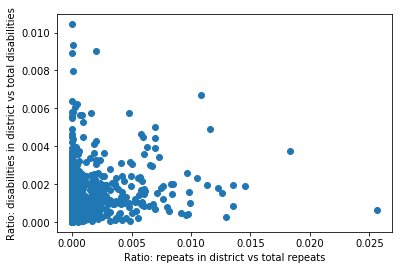

In [13]:
plt.show()

In [22]:
norm_ratio_repeat = (ratio_repeat-np.mean(ratio_repeat))/np.std(ratio_repeat)
norm_ratio_dis = (ratio_total_dis-np.mean(ratio_total_dis))/np.std(ratio_total_dis)
plt.plot(norm_ratio_repeat, norm_ratio_dis,'x')
np.corrcoef(norm_ratio_repeat, norm_ratio_dis)[1,0]

0.094321783665663336

NO big correlation seen

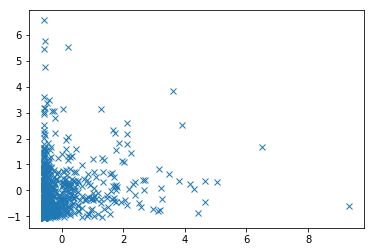

In [23]:
plt.show()

In [31]:
# find the amount of people repeating with respect to the total enrolment
# find enrolment in state
individual_enrol = np.transpose(sum(np.transpose(boys_all.values)) + sum(np.transpose(girls_all.values)))

# ratio of students repeating to students enroled in each district
repeat_district = repeat_individual/individual_enrol
print(repeat_district)

[  0.00000000e+00   7.46022658e-04   2.55838517e-03   0.00000000e+00
   4.36279025e-04   1.92017205e-03   9.37327697e-03   0.00000000e+00
   1.65241459e-04   2.31779167e-02   9.71847548e-03   5.93786449e-03
   1.63924010e-03   1.14882507e-02   0.00000000e+00   5.76522714e-03
   0.00000000e+00   1.80072029e-04   1.21719285e-03   1.41368658e-03
   1.11784867e-02   1.27234171e-03   7.49872522e-04   9.09479254e-04
   0.00000000e+00   1.76017165e-02   4.46990073e-03   7.73617435e-03
   3.79140139e-03   1.00870673e-03   1.66949553e-04   1.13344867e-03
   9.03677271e-04   4.55275844e-03   0.00000000e+00   2.32187128e-04
   4.72950363e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.05064063e-03   0.00000000e+00   7.94128638e-04   0.00000000e+00
   7.76276976e-05   0.00000000e+00   0.00000000e+00   7.78469751e-03
   0.00000000e+00   0.00000000e+00   1.01137800e-03   0.00000000e+00
   5.01439617e-03   0.00000000e+00   0.00000000e+00   2.88500375e-05
   1.32939667e-03   1.38340884e-02

In [111]:
literacy_rate = education_data.loc[:, "OVERALL_LI"]

literacy_rate.head()

#cost_function  = 1.6*literacy_rate/100 + 1.2(Repeat_ratio)
LITERACY_WEIGHT = 2.6
REPEAT_WEIGHT = 1000

cost_func = (literacy_rate - (REPEAT_WEIGHT*repeat_district))/100

data_small["cost_val"] = cost_func


In [112]:
temp = cost_func.argsort()
len(cost_func)
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(cost_func))

In [113]:
print(np.argmax(ranks))

data_small.loc[284,"cost_val"]

284


0.76349999999999996

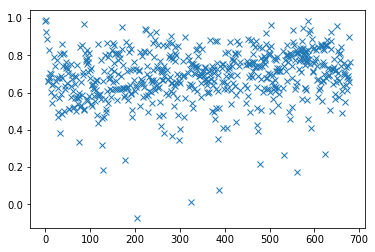

In [115]:
plt.plot(ranks,cost_func,'x')
plt.show()

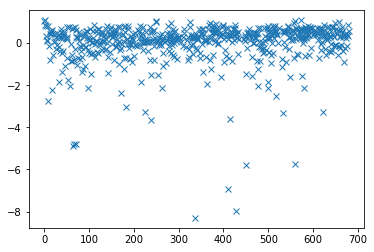

In [101]:
r = (cost_func - np.mean(cost_func))/np.std(cost_func)
plt.plot(ranks,r,'x')
plt.show()

Best Rank: Aizawl, Mizoram: Literacy Rate: 98.5%; Repetition Rate: 3.3E-5 
Wo